### CS 439 Final Project
**Name:** Vic Permakoff\
**NetID:** vdp41\
**Section:** 03

### Project Description:
This project is an unsupervised learning analysis of a mental health survey among IT students in Pakistan. In this project, I look at and modify the dataset using various pandas techniques in order to create visualizations such as charts and graphs in order to display correlations between mental health problems and various factors of student life.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t


In [2]:
# Reading data from the dataset, downloaded and included in the files for the project
# Source: https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey/

survey_data_raw = pd.read_csv("./project/MentalHealthSurvey.csv")


#### Initial display, preprocessing, and description of the data for interpretation

In [3]:

# There are over 20 columns, so we want to be able to see all of them
pd.set_option('display.max_columns', None)

# Display the first ten rows of the dataset
print(survey_data_raw.head(10))


   gender  age university   degree_level      degree_major academic_year  \
0    Male   20         PU  Undergraduate      Data Science      2nd year   
1    Male   20        UET   Postgraduate  Computer Science      3rd year   
2    Male   20       FAST  Undergraduate  Computer Science      3rd year   
3    Male   20        UET  Undergraduate  Computer Science      3rd year   
4  Female   20        UET  Undergraduate  Computer Science      3rd year   
5  Female   20        UET  Undergraduate  Computer Science      3rd year   
6    Male   26         PU   Postgraduate      Data Science      1st year   
7    Male   22         PU  Undergraduate      Data Science      2nd year   
8    Male   20    COMSATS  Undergraduate  Computer Science      3rd year   
9    Male   23    COMSATS  Undergraduate  Computer Science      3rd year   

      cgpa residential_status campus_discrimination sports_engagement  \
0  3.0-3.5         Off-Campus                    No         No Sports   
1  3.0-3.5       

In [4]:

# View the column names in a list to see how the data is measured and whether there are any rows with missing data
print(survey_data_raw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [5]:

# None of the data columns have null values, but it is good practice to clean the data nonetheless.
survey_clean_data = survey_data_raw.dropna()
print(survey_clean_data.isnull().sum())


gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64


In [6]:

# Find the mean, standard deviation, minimum, maximum, median, and interquartile values of the numerical data
print(survey_clean_data.describe())

# None of the minimum, maximum, or mean values of the quantitative data seem unordinary
# Therefore it is likely that there are no extreme outliers that would need to be filtered out.


             age  study_satisfaction  academic_workload   academic_pressure  \
count  87.000000           87.000000           87.000000          87.000000   
mean   19.942529            3.931034            3.885057           3.781609   
std     1.623636            1.043174            0.854880           1.125035   
min    17.000000            1.000000            2.000000           1.000000   
25%    19.000000            3.000000            3.000000           3.000000   
50%    20.000000            4.000000            4.000000           4.000000   
75%    21.000000            5.000000            4.500000           5.000000   
max    26.000000            5.000000            5.000000           5.000000   

       financial_concerns  social_relationships  depression    anxiety  \
count           87.000000             87.000000   87.000000  87.000000   
mean             3.390805              2.781609    3.218391   3.218391   
std              1.400634              1.175578    1.367609   1.29

#### Column Interpretations:

There are 21 columns and 87 rows. Each row represents one participant who took part in the survey, and the columns different questions they were asked. All of the data is quantitative (closed-ended rather than open-ended) and discrete, allowing for easy interpretation. Some of the data columns are measured numerically (age and 9 other scaled variables measured on a range of 1-5), while the other 11 data columns are categorical.

The first column, "gender," asks the gender of the participant (Male or Female).\
The second column, "age," asks the age of the participant. The average age is 19.9.\
The third column, "university," asks which university the participant is from (names of the university have been abbreviated).\
The fourth column, "degree_level," asks whether the participant is an undergrate or postgraduate student.\
The fifth column, "degree_major," asks what the participant's major is (Computer Science, Data Science, Information Technology, or Software Engineering).\
The sixth column, "academic_year," asks what the participant's academic year is (1st, 2nd, 3rd, or 4th).\
The seventh column, "cgpa," asks what the participant's cumulative GPA is within several intervals.\
The eighth column, "residential_status," asks whether the participant lives on-campus or off-campus.\
The ninth column, "campus_discrimination," asks whether the participant experiences discrimination on-campus.\
The tenth column, "sports_engagement," asks whether the participant engages in any sports, and how often.\
The eleventh column, "average_sleep," asks how much average sleep the participant gets per night.

The following 9 columns are scaled from 1 to 5.\
The column "study_satisfaction" asks how satisfied the participant is with how much they study. The average is a 3.9/5, suggesting a relatively higher than mid-rate satisfaction in study time among the average student.\
The column "academic_workload" asks how difficult the participant considers their workload to be. The average is a 3.9/5, suggesting a relatively tougher than mid-rate workload. No students reported their workload to be less than 2/5.\
The column "academic_pressure" asks how much pressure the participant feels, academically. The average is a 3.8, suggesting that there is quite a bit of pressure among students to succeed academically.\
The column "financial_concerns" asks how concerned the participant feels about their financial situation. The average is a 3.7/5, showing that quite a few students feel concerned with their finances.\
The column "social_relationships" asks how the participant feels about their social relationships. It's unclear if this column is measuring personal satisfaction or general existance of social relationships. The average is a 2.7/5, an average much lower than the previous variables. It's possible that this means students may be more encouraged to focus on their education than social life in the surveyed universities.\
The column "depression" asks the participant to rate their feelings of depression. It's unclear if this is referring to feeling "depressed" or to whether the participant actually considers themselves to have symptoms of mood disorders such as Major Depressive Disorder (MDD). The average is a 3.2/5, which is higher than the median rate, suggesting that quite a few students feel in some way depressed, or feel rather severely depressed (>3).\
The column "anxiety" asks the participant to rate their feelings of anxiety. Again, it is unclear if this is referring to anxiety disorders such as General Anxiety Disorder or Social Anxiety Disorder, or general feelings of nervousness/worry. The average is also a 3.2/5.\
The column "isolation" asks the participant to rate their isolation. It is unclear if this is referring to how isolated they feel from others, or how often they isolate themselves. The average is 3.2/5.\
The column "future_insecurity" asks the participant how insecure they feel about their future. It is unclear if this is measuring near future or post-graduation futures. The average is a 3.0/5.



#### Data Visualization

In [ ]:
# First use a heatmap to look for correlations between ordinal variables

plt.figure(figsize=(10, 6))
sns.heatmap(survey_clean_data.iloc[:, 11:20].corr(), annot=True, cmap="vlag_r")
plt.title('Correlational Heatmap for Mental Health Variables')
plt.show()

# There is a clear correlation between several variables such as anxiety and depression.

In [ ]:

# Plot a scatterplot with a linear regression to more clearly show the relationship between anxiety and depression
# Jitter is added for visual clarity
# Colors are added to also analyze isolation as a factor
sns.lmplot(x='depression', y='anxiety', hue='isolation', data=survey_clean_data, x_jitter = 0.25, y_jitter = 0.25)
plt.title("Linear relationship between Depression and Anxiety")
plt.show()


In [ ]:

# Create a new column in the dataset to indicate whether the individual has high depression/anxiety (>3)
depanx_data = survey_clean_data.drop(columns=['depression', 'anxiety'])
cond = [
    (survey_clean_data['depression'] <= 3) & (survey_clean_data['anxiety'] <= 3),
    (survey_clean_data['depression'] <= 3) & (survey_clean_data['anxiety'] > 3),
    (survey_clean_data['depression'] > 3) & (survey_clean_data['anxiety'] <= 3),
    (survey_clean_data['depression'] > 3) & (survey_clean_data['anxiety'] > 3)
]
val = ['low anx, low dep', 'high anx, low dep', 'low anx, high dep', 'high anx, high dep']
depanx_data['high_depanx'] = np.select(cond, val, default='unknown')


# Graph several histograms comparing the data using relationships found earlier
# Find new relationships by comparing data among individuals who face discrimination and live on- or off-campus
graph = sns.FacetGrid(depanx_data, col='residential_status', row='campus_discrimination', margin_titles=True)
graph.map(sns.histplot, 'isolation', hue=depanx_data['high_depanx'], bins=5, kde=True)
graph.add_legend(labels=['low anx, high dep', 'high anx, low dep', 'high anx, high dep', 'low anx, low dep'])
plt.show()


In [ ]:

# Graph several histograms comparing the data using relationships found earlier
# Find new relationships by comparing data among individuals who face discrimination and live on- or off-campus
graph = sns.FacetGrid(depanx_data, col='residential_status', row='campus_discrimination', margin_titles=True)
graph.map(sns.histplot, 'social_relationships', hue=depanx_data['high_depanx'], bins=5, kde=True)
graph.add_legend(labels=['low anx, high dep', 'high anx, low dep', 'high anx, high dep', 'low anx, low dep'])
plt.show()


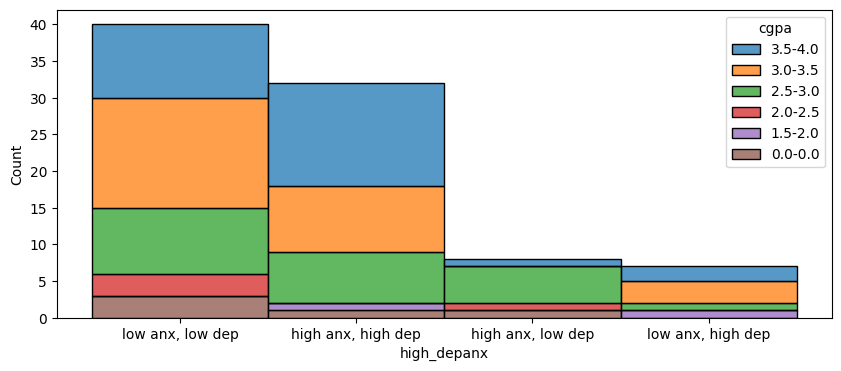

In [11]:

# Create a histogram of the cGPA of students alongside their levels of depression/anxiety.
gpa_sort = list(dict.fromkeys(sorted(depanx_data['cgpa'],)))
gpa_sort = sorted(gpa_sort, reverse=True)
plt.figure(figsize=(10,4))
sns.histplot(data=depanx_data, x='high_depanx', hue='cgpa', hue_order=gpa_sort, multiple='stack')
plt.show()


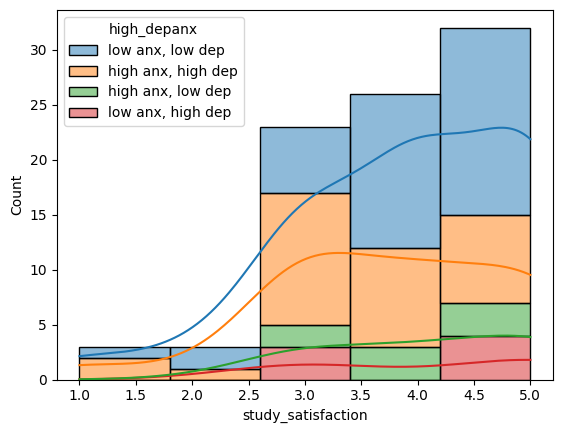

In [12]:

sns.histplot(data=depanx_data, x='study_satisfaction', hue=depanx_data['high_depanx'], bins=5, multiple="stack", kde=True, legend=True)
plt.show()


#### Use Statistical Tests such as two-sample T-tests to identify significance between variables

In [13]:

# Find whether there is statistical significance in the correlation between depression and anxiety;
# and isolation, social relationships, study satisfaction, academic pressure, and future insecurity.

# Separate the isolation data into four arrays, two containing high levels of depression and anxiety (>3)
# and two containing low (below average) levels of depression and anxiety (<=3)
high_dep_isol = survey_clean_data[survey_clean_data['depression'] > 3]['isolation']
low_dep_isol = survey_clean_data[survey_clean_data['depression'] <= 3]['isolation']
high_anx_isol = survey_clean_data[survey_clean_data['anxiety'] > 3]['isolation']
low_anx_isol = survey_clean_data[survey_clean_data['anxiety'] <= 3]['isolation']

t_stat_dep, p_val_dep = stats.ttest_ind(high_dep_isol, low_dep_isol)
t_stat_anx, p_val_anx = stats.ttest_ind(high_anx_isol, low_anx_isol)

# print("T-statistic:", t_stat_dep, "(dep) and", t_stat_anx, "(anx)")
# print("P-value:", p_val_dep, "(dep) and", p_val_anx, "(anx)")

results_table = pd.DataFrame({'Variable': ['isolation'],
                              'T-statistic (depression)': [t_stat_dep],
                              'T-statistic (anxiety)': [t_stat_anx],
                              'P-value (depression)': [p_val_dep],
                              'P-value (anxiety)': [p_val_anx]})
results_table.head()


,Variable,T-statistic (depression),T-statistic (anxiety),P-value (depression),P-value (anxiety)
0,isolation,7.006156,6.620261,5.399859e-10,3.060326e-09


In [14]:

# Repeat this for other variables 
# This can absolutely be done with a for loop but honestly I ran out of time

# study_satisfaction
high_dep_stud = survey_clean_data[survey_clean_data['depression'] > 3]['study_satisfaction']
low_dep_stud = survey_clean_data[survey_clean_data['depression'] <= 3]['study_satisfaction']
high_anx_stud = survey_clean_data[survey_clean_data['anxiety'] > 3]['study_satisfaction']
low_anx_stud = survey_clean_data[survey_clean_data['anxiety'] <= 3]['study_satisfaction']

t_stat_dep, p_val_dep = stats.ttest_ind(high_dep_stud, low_dep_stud)
t_stat_anx, p_val_anx = stats.ttest_ind(high_anx_stud, low_anx_stud)

stud_dat = ['study_satisfaction', t_stat_dep, t_stat_anx, p_val_dep, p_val_anx]
results_table.loc[len(results_table)] = stud_dat

# social_relationships
high_dep_socr = survey_clean_data[survey_clean_data['depression'] > 3]['social_relationships']
low_dep_socr = survey_clean_data[survey_clean_data['depression'] <= 3]['social_relationships']
high_anx_socr = survey_clean_data[survey_clean_data['anxiety'] > 3]['social_relationships']
low_anx_socr = survey_clean_data[survey_clean_data['anxiety'] <= 3]['social_relationships']

t_stat_dep, p_val_dep = stats.ttest_ind(high_dep_socr, low_dep_socr)
t_stat_anx, p_val_anx = stats.ttest_ind(high_anx_socr, low_anx_socr)

socr_dat = ['social_relationships', t_stat_dep, t_stat_anx, p_val_dep, p_val_anx]
results_table.loc[len(results_table)] = socr_dat

# academic_pressure
high_dep_acpr = survey_clean_data[survey_clean_data['depression'] > 3]['academic_pressure']
low_dep_acpr = survey_clean_data[survey_clean_data['depression'] <= 3]['academic_pressure']
high_anx_acpr = survey_clean_data[survey_clean_data['anxiety'] > 3]['academic_pressure']
low_anx_acpr = survey_clean_data[survey_clean_data['anxiety'] <= 3]['academic_pressure']

t_stat_dep, p_val_dep = stats.ttest_ind(high_dep_acpr, low_dep_acpr)
t_stat_anx, p_val_anx = stats.ttest_ind(high_anx_acpr, low_anx_acpr)

acpr_dat = ['academic_pressure', t_stat_dep, t_stat_anx, p_val_dep, p_val_anx]
results_table.loc[len(results_table)] = acpr_dat

print("T-statistic:", t_stat_dep, "(dep) and", t_stat_anx, "(anx)")
print("P-value:", p_val_dep, "(dep) and", p_val_anx, "(anx)")

# future_insecurity
high_dep_fuin = survey_clean_data[survey_clean_data['depression'] > 3]['future_insecurity']
low_dep_fuin = survey_clean_data[survey_clean_data['depression'] <= 3]['future_insecurity']
high_anx_fuin = survey_clean_data[survey_clean_data['anxiety'] > 3]['future_insecurity']
low_anx_fuin = survey_clean_data[survey_clean_data['anxiety'] <= 3]['future_insecurity']

t_stat_dep, p_val_dep = stats.ttest_ind(high_dep_fuin, low_dep_fuin)
t_stat_anx, p_val_anx = stats.ttest_ind(high_anx_fuin, low_anx_fuin)

fuin_dat = ['future_insecurity', t_stat_dep, t_stat_anx, p_val_dep, p_val_anx]
results_table.loc[len(results_table)] = fuin_dat

print(results_table)

T-statistic: 3.1208417894649365 (dep) and 2.9401926567709182 (anx)
P-value: 0.0024637407961398614 (dep) and 0.004223947109952171 (anx)
               Variable  T-statistic (depression)  T-statistic (anxiety)  \
0             isolation                  7.006156               6.620261   
1    study_satisfaction                 -1.737430              -1.718709   
2  social_relationships                 -2.755814              -3.340623   
3     academic_pressure                  3.120842               2.940193   
4     future_insecurity                  4.589371               4.156415   

   P-value (depression)  P-value (anxiety)  
0          5.399859e-10       3.060326e-09  
1          8.593341e-02       8.930763e-02  
2          7.162231e-03       1.243402e-03  
3          2.463741e-03       4.223947e-03  
4          1.522933e-05       7.677760e-05  


In [15]:
results_table.head()

,Variable,T-statistic (depression),T-statistic (anxiety),P-value (depression),P-value (anxiety)
0,isolation,7.006156,6.620261,5.399859e-10,3.060326e-09
1,study_satisfaction,-1.737430,-1.718709,8.593341e-02,8.930763e-02
2,social_relationships,-2.755814,-3.340623,7.162231e-03,1.243402e-03
3,academic_pressure,3.120842,2.940193,2.463741e-03,4.223947e-03
4,future_insecurity,4.589371,4.156415,1.522933e-05,7.677760e-05
